In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!nvidia-smi

Tue Apr  5 10:57:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 496.76       Driver Version: 496.76       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   51C    P5    11W / 200W |   8131MiB /  8192MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
from numpy.random import seed
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import glob
import cv2
import numpy as np
from tensorflow.random import set_seed
from tensorflow.keras.models import Sequential, Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


In [4]:
pd.options.display.max_colwidth = 300

In [5]:
absolute_path = os.path.abspath(os.curdir)
main_path = "drive/MyDrive/tni/archive"
main_path = os.path.join(absolute_path, main_path)
print(main_path)
test_path = os.path.join(main_path,"test")

import os

filenames= os.listdir(test_path) # get all files' and folders' names in the current directory

names = []
names.sort()
for filename in filenames: # loop through all the files and folders
    names.append(filename)

test_list = []
for name in names:
  test_list.extend(glob.glob(test_path+"/"+name+"/*.jpg"))

print(test_list)


C:\Users\Thiba\drive/MyDrive/tni/archive
['C:\\Users\\Thiba\\drive/MyDrive/tni/archive\\test/abraham_grampa_simpson\\pic_0003.jpg', 'C:\\Users\\Thiba\\drive/MyDrive/tni/archive\\test/abraham_grampa_simpson\\pic_0021.jpg', 'C:\\Users\\Thiba\\drive/MyDrive/tni/archive\\test/abraham_grampa_simpson\\pic_0031.jpg', 'C:\\Users\\Thiba\\drive/MyDrive/tni/archive\\test/abraham_grampa_simpson\\pic_0032.jpg', 'C:\\Users\\Thiba\\drive/MyDrive/tni/archive\\test/abraham_grampa_simpson\\pic_0043.jpg', 'C:\\Users\\Thiba\\drive/MyDrive/tni/archive\\test/abraham_grampa_simpson\\pic_0051.jpg', 'C:\\Users\\Thiba\\drive/MyDrive/tni/archive\\test/abraham_grampa_simpson\\pic_0099.jpg', 'C:\\Users\\Thiba\\drive/MyDrive/tni/archive\\test/abraham_grampa_simpson\\pic_0105.jpg', 'C:\\Users\\Thiba\\drive/MyDrive/tni/archive\\test/abraham_grampa_simpson\\pic_0164.jpg', 'C:\\Users\\Thiba\\drive/MyDrive/tni/archive\\test/abraham_grampa_simpson\\pic_0179.jpg', 'C:\\Users\\Thiba\\drive/MyDrive/tni/archive\\test/abraham

In [6]:

#Construction d'un dataframe montrant les longueurs de chaques labels

name_img_counts = {}
for name in names:
  name_img_counts[name] = len(os.listdir(test_path+"/"+name))
print(name_img_counts)

np_array = []
for name in names:
  np_array = np.append(
      np_array, [(name[:8] + '..') if len(name) > 8 else name]*name_img_counts[name]
  )

df_test = pd.DataFrame(np_array, columns = ['label'])
df_test['image'] = [x for x in test_list]

{'abraham_grampa_simpson': 50, 'apu_nahasapeemapetilon': 50, 'bart_simpson': 50, 'charles_montgomery_burns': 50, 'chief_wiggum': 50, 'comic_book_guy': 50, 'edna_krabappel': 50, 'homer_simpson': 50, 'kent_brockman': 50, 'krusty_the_clown': 50, 'lenny_leonard': 50, 'lisa_simpson': 50, 'marge_simpson': 50, 'milhouse_van_houten': 50, 'moe_szyslak': 50, 'ned_flanders': 50, 'nelson_muntz': 50, 'principal_skinner': 50, 'sideshow_bob': 50}


In [7]:
df_test #visualisation des images

,label,image
0,abraham_..,C:\Users\Thiba\drive/MyDrive/tni/archive\test/abraham_grampa_simpson\pic_0003.jpg
1,abraham_..,C:\Users\Thiba\drive/MyDrive/tni/archive\test/abraham_grampa_simpson\pic_0021.jpg
2,abraham_..,C:\Users\Thiba\drive/MyDrive/tni/archive\test/abraham_grampa_simpson\pic_0031.jpg
3,abraham_..,C:\Users\Thiba\drive/MyDrive/tni/archive\test/abraham_grampa_simpson\pic_0032.jpg
4,abraham_..,C:\Users\Thiba\drive/MyDrive/tni/archive\test/abraham_grampa_simpson\pic_0043.jpg
...,...,...
945,sideshow..,C:\Users\Thiba\drive/MyDrive/tni/archive\test/sideshow_bob\pic_0780.jpg
946,sideshow..,C:\Users\Thiba\drive/MyDrive/tni/archive\test/sideshow_bob\pic_0808.jpg
947,sideshow..,C:\Users\Thiba\drive/MyDrive/tni/archive\test/sideshow_bob\pic_0832.jpg
948,sideshow..,C:\Users\Thiba\drive/MyDrive/tni/archive\test/sideshow_bob\pic_0848.jpg


In [8]:
path = main_path+'/test'
#List of image:
img_list = list(df_test['image'])
data_img = []
for each in img_list:
    #Each image path:
    each_path = os.path.join(path, each)
    #Read each image:
    each_img = plt.imread(each_path)
    #Resize the images:
    each_img_resized = cv2.resize(each_img, (128,128))
    #Save arrays to a list:
    data_img.append(each_img_resized)
# Converting list to numpy array
X = np.array(data_img)
print('Shape of X: ', X.shape)
y = OneHotEncoder(dtype='int8', sparse=False).fit_transform(df_test['label'].values.reshape(-1,1))
print('Shape of y: ', y.shape)

Shape of X:  (950, 128, 128, 3)
Shape of y:  (950, 19)


Distribution des images par labels

C:\Users\Thiba\anaconda3\envs\classenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


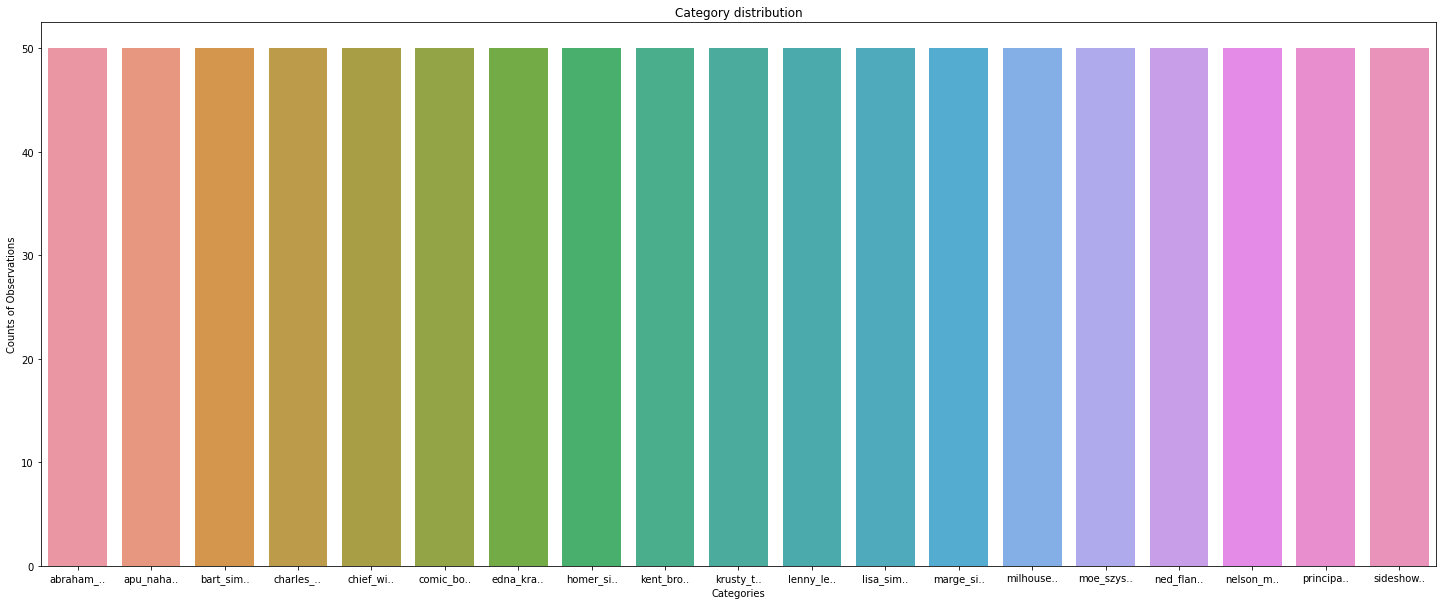

In [9]:
f = plt.figure(1,figsize=(25,10))
sns.countplot(df_test['label'])
plt.title('Category distribution')
plt.xlabel('Categories')
plt.ylabel('Counts of Observations');


In [10]:
new_model = tf.keras.models.load_model('drive/MyDrive/tni/saved_models/my_model.h5')

In [11]:
loss, acc = new_model.evaluate(X, y, verbose=2)
print(f"accuracy : {round(acc*100,3)} ; loss :{round(loss*100,3)}")

30/30 - 8s - loss: 0.2128 - accuracy: 0.9484
accuracy : 94.842 ; loss :21.277


In [12]:
def imgTest(im_arr):
  #Prediction
  prediction = new_model.predict(im_arr)
  score= tf.nn.softmax(prediction[0])
  return names[np.argmax(score)], score

def singleImgTest(img_path):
  img = tf.keras.preprocessing.image.load_img(img_path, target_size = (128, 128))
  plt.imshow(img)
  im_arr = tf.keras.preprocessing.image.img_to_array(img)
  im_arr = tf.expand_dims(im_arr, 0)
  name, score = imgTest(im_arr)
  print("Cette image semble correspondre à {} avec {:.2f}% de confiance."
          .format(name, 100*np.max(score)))

Cette image semble correspondre à bart_simpson avec 13.12% de confiance.


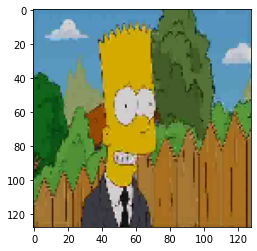

In [13]:
singleImgTest("drive/MyDrive/tni/archive/test/bart_simpson/pic_0192.jpg")


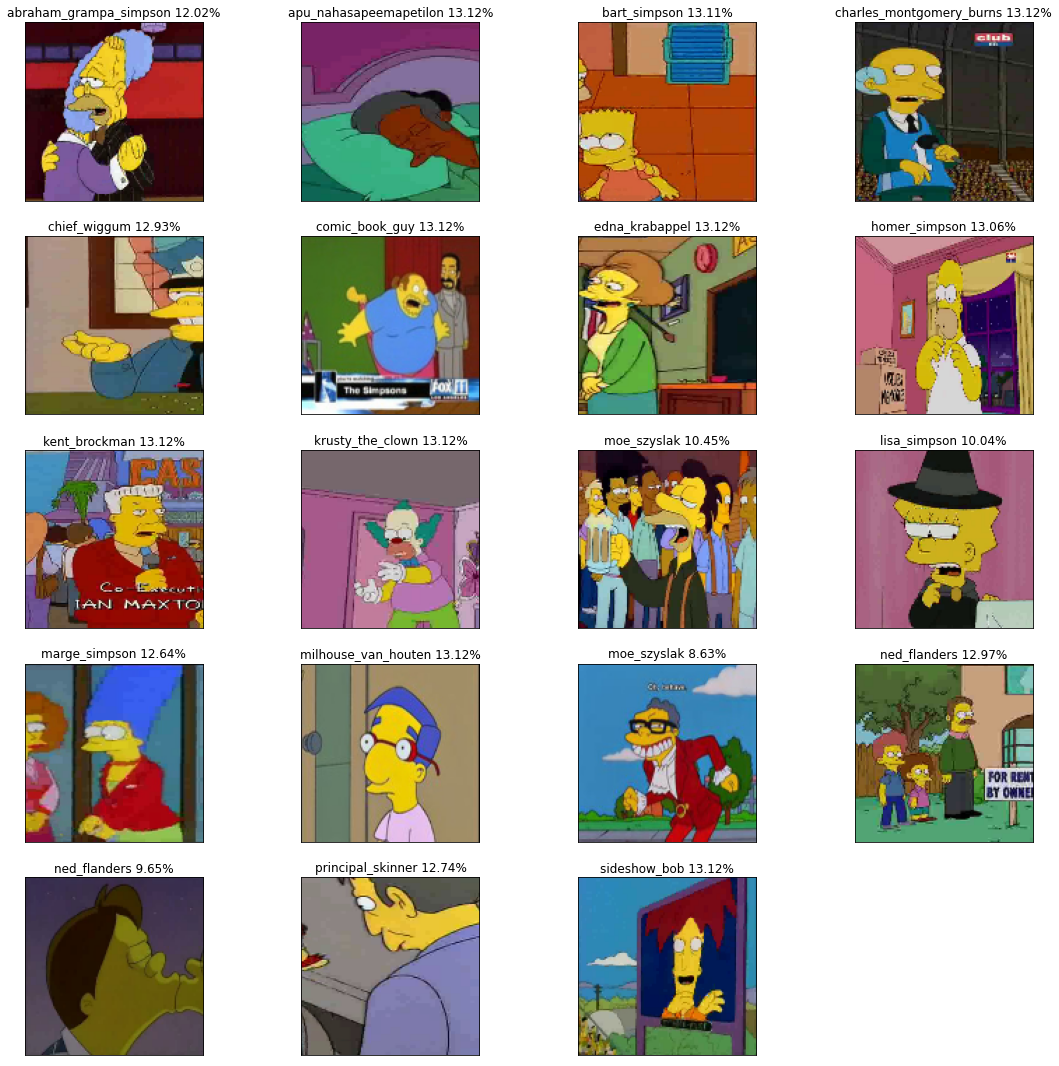

In [14]:
import random
plt.figure(figsize=(19,19))
for i in range(19):
    plt.subplot(5,4,i+1)
    im = X[random.randint((i*50),((i+1)*50))]
    plt.imshow(im)
    im_arr = tf.keras.preprocessing.image.img_to_array(im)
    im_arr = tf.expand_dims(im_arr, 0)
    name, score = imgTest(im_arr)
    plt.title(name + " {:.2f}%".format(100*np.max(score)))
    plt.xticks([])
    plt.yticks([])